In [2]:
#importing standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
df=pd.read_csv('/content/drive/MyDrive/Deep learning/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
#check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

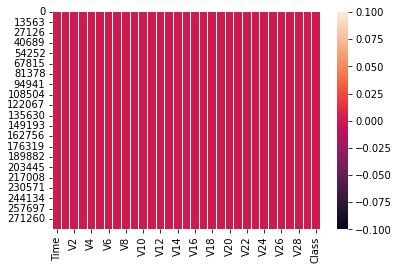

In [7]:
#viualisation of null values
sb.heatmap(df.isnull())
plt.show()

In [8]:
#how many category variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

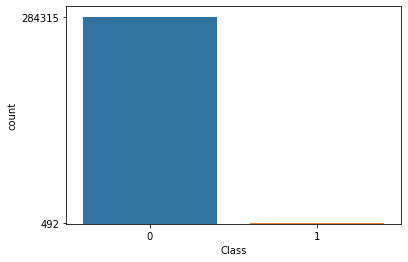

In [9]:
#visualisation of data is balanced or not
sb.countplot(data=df,x='Class')
f=df['Class'].value_counts()
plt.yticks(f)
plt.show()

In [10]:
#clearlt see , data is unbalance
#but first separate input and output from given dataset
X=df[['Amount','Time']]
Y=df['Class']

In [11]:
X.shape

(284807, 2)

In [12]:
Y.shape

(284807,)

In [13]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [14]:
X_test.shape,X_train.shape

((85443, 2), (199364, 2))

In [15]:
Y_test.shape,Y_train.shape

((85443,), (199364,))

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [17]:
#converts minority class to majority class
from imblearn.over_sampling import RandomOverSampler
#create object of class
ros=RandomOverSampler()


In [18]:
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [19]:
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [20]:
Y_train1.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [21]:
Y_test1.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [22]:
X_test1.shape

(170616, 2)

In [23]:
#create neaural network 
import tensorflow as tf
#create object of Sequential class
model=tf.keras.Sequential([
    #first hidden layer 
    tf.keras.layers.Dense(units=64,activation='relu',input_shape=(X.shape[1],)),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu'),
    #Third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu'),
    #fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu'),
    #output layer 
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [24]:
from tensorflow.python import summary
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [25]:
#compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
#create a procedure for early stopping 
#call inbuilt class : EarlyStopping 
from tensorflow.keras.callbacks import EarlyStopping
#create object of EarlyStopping class
cb=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False

)

In [29]:
#train the model
trained_model=model.fit(X_train1,Y_train1,epochs=5000,validation_data=(X_test1,Y_test1),batch_size=64,callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.5849 - accuracy: 0.6857 - val_loss: 0.6509 - val_accuracy: 0.6512
Epoch 2/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.5335 - accuracy: 0.7304 - val_loss: 0.6820 - val_accuracy: 0.6735
Epoch 3/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.5177 - accuracy: 0.7415 - val_loss: 0.6827 - val_accuracy: 0.6518
Epoch 4/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.5029 - accuracy: 0.7499 - val_loss: 0.7382 - val_accuracy: 0.6579
Epoch 5/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.4884 - accuracy: 0.7607 - val_loss: 0.8142 - val_accuracy: 0.6512
Epoch 6/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.4756 - accuracy: 0.7686 - val_loss: 0.8887 - val_accuracy: 0.6484
Epoch 7/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.4656 - accuracy: 0.7726 - val_loss: 1

In [30]:
#Evaluate the model
print('Training loss and Accuracy:',model.evaluate(X_train1,Y_train1))
print('Testing loss and Accuracy:',model.evaluate(X_test1,Y_test1))

12438/12438 [==============================] - 21s 2ms/step - loss: 0.4240 - accuracy: 0.8029
Training loss and Accuracy: [0.42401742935180664, 0.8028637170791626]
5332/5332 [==============================] - 11s 2ms/step - loss: 1.9980 - accuracy: 0.6500
Testing loss and Accuracy: [1.9980090856552124, 0.6499918103218079]


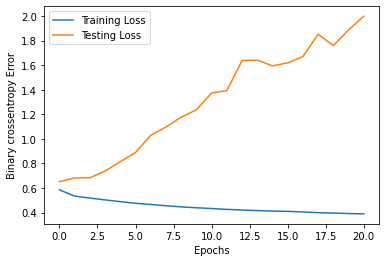

In [31]:
#visualisation for loss of training and testing
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary crossentropy Error')
plt.legend()
plt.show()

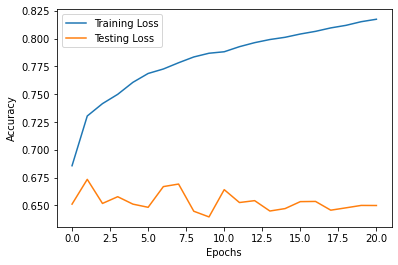

In [32]:
#visualisation for accuracy of training and testing
plt.plot(trained_model.history['accuracy'],label='Training Loss')
plt.plot(trained_model.history['val_accuracy'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
#clearly understand model is overfit
#so to remove overfitting problem use overfitting method first
#use dropout
#dropout always in between 20% to 50%
#create neaural network 
import tensorflow as tf
from tensorflow.keras.layers import Dropout
#create object of Sequential class
model1=tf.keras.Sequential([
    #first hidden layer 
    tf.keras.layers.Dense(units=64,activation='relu',input_shape=(X.shape[1],)),Dropout(0.30),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu'),Dropout(0.30),
    #Third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu'),Dropout(0.30),
    #fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu'),
    #output layer 
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [55]:
#compile model
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
#train the model
trained_model1=model1.fit(X_train1,Y_train1,epochs=5000,validation_data=(X_test1,Y_test1),batch_size=64,callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.6305 - accuracy: 0.6471 - val_loss: 0.6159 - val_accuracy: 0.6797
Epoch 2/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.5786 - accuracy: 0.7041 - val_loss: 0.6158 - val_accuracy: 0.6764
Epoch 3/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.5668 - accuracy: 0.7116 - val_loss: 0.6115 - val_accuracy: 0.6936
Epoch 4/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.5609 - accuracy: 0.7153 - val_loss: 0.6113 - val_accuracy: 0.6892
Epoch 5/5000
6219/6219 [==============================] - 21s 3ms/step - loss: 0.5573 - accuracy: 0.7190 - val_loss: 0.6088 - val_accuracy: 0.6830
Epoch 6/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.5567 - accuracy: 0.7190 - val_loss: 0.6123 - val_accuracy: 0.6773
Epoch 7/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.5553 - accuracy: 0.7196 - val_loss: 0

In [57]:
#Evaluate the model
print('Training loss and Accuracy:',model1.evaluate(X_train1,Y_train1))
print('Testing loss and Accuracy:',model1.evaluate(X_test1,Y_test1))

12438/12438 [==============================] - 24s 2ms/step - loss: 0.5286 - accuracy: 0.7509
Training loss and Accuracy: [0.5285781025886536, 0.7509183287620544]
5332/5332 [==============================] - 9s 2ms/step - loss: 0.6088 - accuracy: 0.6879
Testing loss and Accuracy: [0.6087650060653687, 0.6878663301467896]


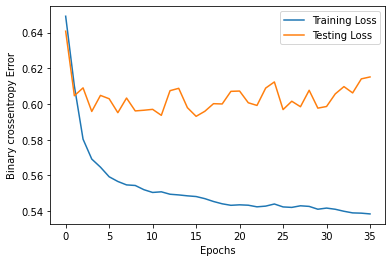

In [37]:
#visualisation for loss of training and testing
plt.plot(trained_model1.history['loss'],label='Training Loss')
plt.plot(trained_model1.history['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary crossentropy Error')
plt.legend()
plt.show()

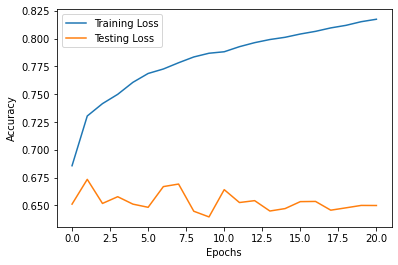

In [38]:
#visualisation for accuracy of training and testing
plt.plot(trained_model1.history['accuracy'],label='Training Loss')
plt.plot(trained_model1.history['val_accuracy'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
#here training score > testting score 
#clearly understand model is overfit
#use 2nd overfitting method regularisation l2
#create neaural network 
from tensorflow.keras import regularizers
#create object of Sequential class
model2=tf.keras.Sequential([
    #first hidden layer 
    tf.keras.layers.Dense(units=64,activation='relu',
                          kernel_regularizer=regularizers.l2(0.01),input_shape=(X.shape[1],)),Dropout(0.30),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),
    #Third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),
    #fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    #output layer 
    tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))
])

In [41]:
#compile model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
#train the model
trained_model2=model2.fit(X_train1,Y_train1,epochs=5000,validation_data=(X_test1,Y_test1),batch_size=64,callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 25s 4ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5000
6219/6219 [==============================] - 23s 4ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5000
6219/6219 [==============================] - 27s 4ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5000
6219/6219 [==============================] - 24s 4ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5000
6219/6219 [==============================] - 21s 3ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/5000
6219/6219 [==============================] - 21s 3ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/5000
6219/6219 [==============================] - 22s 4ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0

In [44]:
#Evaluate the model
print('Training loss and Accuracy:',model2.evaluate(X_train1,Y_train1))
print('Testing loss and Accuracy:',model2.evaluate(X_test1,Y_test1))
#testing score and training score  same
#but score is not good

12438/12438 [==============================] - 21s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Training loss and Accuracy: [0.6932468414306641, 0.5]
5332/5332 [==============================] - 9s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Testing loss and Accuracy: [0.6932426691055298, 0.5]


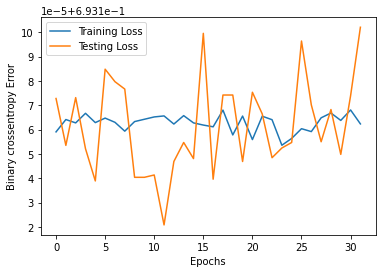

In [45]:
#visualisation for loss of training and testing
plt.plot(trained_model2.history['loss'],label='Training Loss')
plt.plot(trained_model2.history['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary crossentropy Error')
plt.legend()
plt.show()

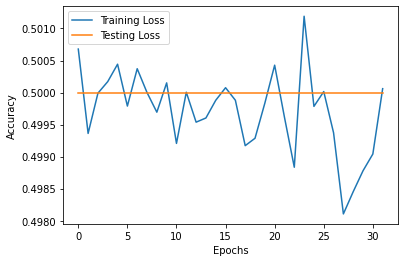

In [46]:
#visualisation for accuracy of training and testing
plt.plot(trained_model2.history['accuracy'],label='Training Loss')
plt.plot(trained_model2.history['val_accuracy'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
#Find the predicttion means test the model with 30% data
Y_pred=model1.predict(X_test1).round(2)

5332/5332 [==============================] - 8s 1ms/step


In [59]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [60]:
#generate classification report 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71     85308
           1       0.73      0.60      0.66     85308

    accuracy                           0.69    170616
   macro avg       0.69      0.69      0.68    170616
weighted avg       0.69      0.69      0.68    170616

[[65893 19415]
 [34021 51287]]
